# Exercise 4.9 Intro to Data Visualization with Python (Part 2)

# 01. Importing libraries

In [4]:
# Import the libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [6]:
# Create a file path

path = r'/Users/vijaykasturi/Library/CloudStorage/OneDrive-Personal/Data Analytics Course - CareerFoundry/Data Immersion/A4/Instacart Basket Analysis'

In [7]:
# Import the merged file created in Part 1 from Prepared Data folder

df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_merged_4.9_part1.pkl'))

In [8]:
df_merged.head()

,user_id,First Name,Last Name,Gender,STATE,Age,No of Dependents,Marital Status,Annual Income,Unnamed: 0_x,...,busiest_day,daily_traffic_label,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,ord_freq,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443891,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443892,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443893,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443893,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443893,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both


# Part 2.2: Charts & Histograms already created during the exercise. The notebook is separately attached.

# Analysis & Visualizations for Instacart Stakeholders

Text(0, 0.5, 'Order Frequency')

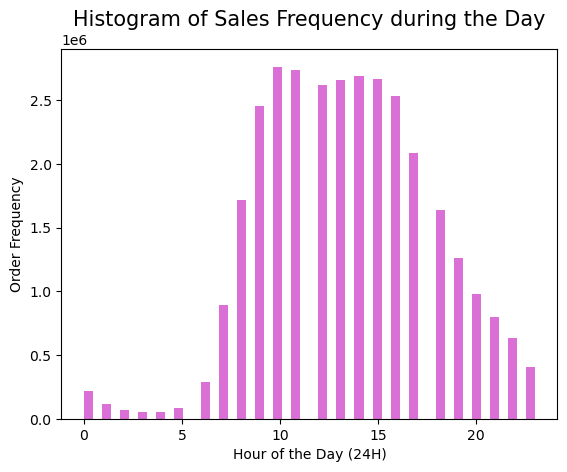

In [11]:
# Part 2.3: Create a Histogram to provide the Instacart senior stakeholders with descriptive findings about sales

Hist_2_3 = df_merged['order_hour_of_day'].plot.hist(bins = 50, color = ['orchid'])
plt.title("Histogram of Sales Frequency during the Day", fontsize = 15)
plt.xlabel("Hour of the Day (24H)", fontsize = 10)
plt.ylabel("Order Frequency", fontsize = 10)

# Part 2.3: The histogram describes the busiest hours of the day for Instacart
# It is busiest between 9AM and 4PM, with the most orders coming in at 10 & 11 AM, followed by 1-3 PM.

In [73]:
# Part 2.4: Create a Bar Chart showing the distribution of orders among customers in terms of loyalty

# First we create an array of the Average number of orders and group them by Loyalty Flag

orders = df_merged.groupby('loyalty_flag')['order_number'].mean()

Text(0, 0.5, 'Average Orders')

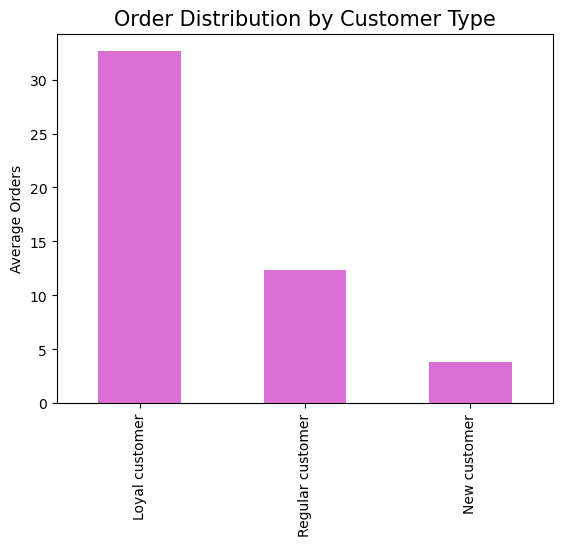

In [83]:
# Next we plot the bar chart using the array, sorted in descending order

bar_2_4 = orders.sort_values(ascending=[False]).plot.bar(color = ['orchid'])

plt.title("Order Distribution by Customer Type", fontsize = 15)
plt.xlabel(None)
plt.ylabel("Average Orders", fontsize = 10)

# Part 2.4: Loyal Customers place around 33 orders on average compared to 13 by Regular Customers & 4 by New Customers.

In [85]:
# Part 2.5: Checking for variances in expenditure based on hour of the day

# Step 1 - Create a representative sample (70/30) of the data

np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [87]:
# Step 2 - Store 70% of sample in data frame Big

Big = df_merged[dev]

In [89]:
# Step 3 - Store 30% of sample in data frame Small

Small = df_merged[~dev]

In [91]:
# Step 4 - Creating data frame with only necessary columns

df_2 = Small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Expenditure')

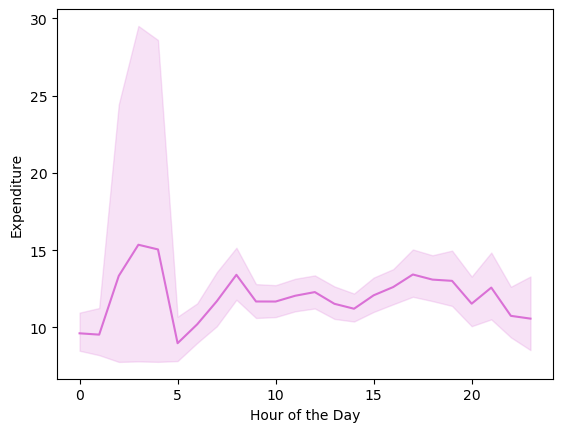

In [95]:
# Step 5 - Creating Line Chart with Sample "Small"

Line_5_4_Small = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices',color = 'orchid')

#plt.title("Order Distribution by Customer Type", fontsize = 15)
plt.xlabel("Hour of the Day", fontsize = 10)
plt.ylabel("Expenditure", fontsize = 10)

# The line chart shows heightened expenditure in the early morning hours (1-4 AM). However, the thickness of translucent band implies this time period could see big swings, so it may not be a very accurate indicator of future trends.

# There is a more or less steady line from 9AM onwards, with minor spikes or dips. Also, the translucent band is quite narrow, meaning any forecast lies within the 95% confidence band.

Text(0, 0.5, 'Expenditure')

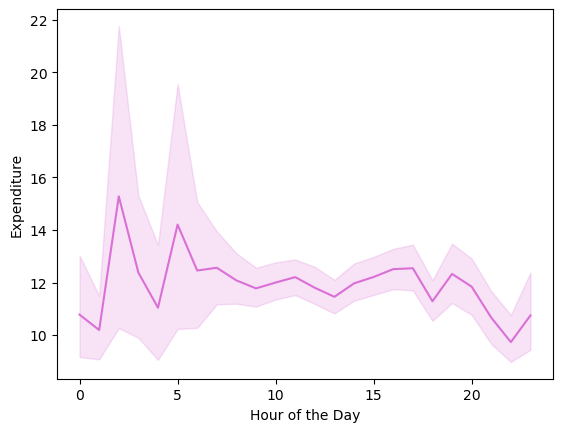

In [97]:
# Step 6 - Compare with Larger sample

df_3 = Big[['order_hour_of_day','prices']]

Line_5_4_Big = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices',color = 'orchid')
plt.xlabel("Hour of the Day", fontsize = 10)
plt.ylabel("Expenditure", fontsize = 10)

# The line charts for both samples are largely the same, except for the spike seen at 5AM in the larger sample.

Text(0, 0.5, 'No of Dependents')

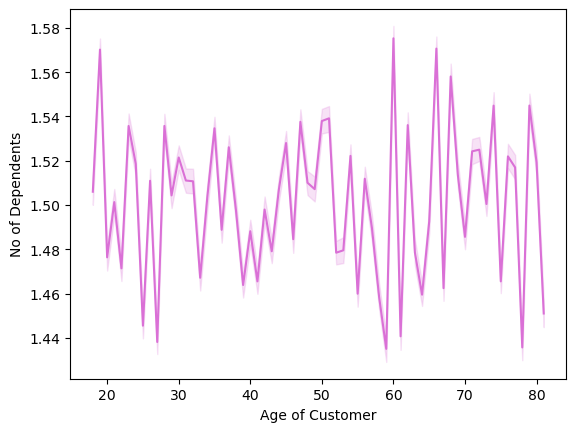

In [99]:
# Part 2.6: Determining whether there’s a connection between age and family situation

# Since we already have our samples, we just need to create a subset data frame with the columns Age & No of Dependents and plot the line

df_3 = Small[['Age','No of Dependents']]

Line_5_6_Small = sns.lineplot(data = df_3, x = 'Age',y = 'No of Dependents',color = 'orchid')
plt.xlabel("Age of Customer", fontsize = 10)
plt.ylabel("No of Dependents", fontsize = 10)

# We cannot draw any inferences or connection between Age of Customer and No of Dependents.

Text(0, 0.5, 'Annual Income')

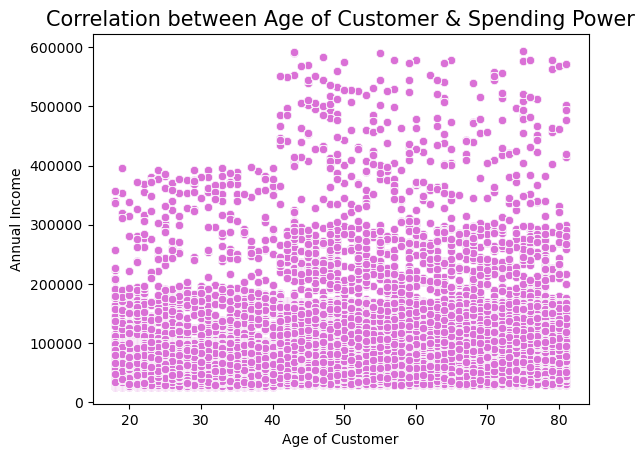

In [121]:
# Part 2.7: Explore connection between age and spending power using a Scatterplot

Scatter_2_7 = sns.scatterplot(x = 'Age', y = 'Annual Income', data = df_merged, color = 'orchid')

plt.title("Correlation between Age of Customer & Spending Power", fontsize = 15)
plt.xlabel("Age of Customer", fontsize = 10)
plt.ylabel("Annual Income", fontsize = 10)

# From this Scatterplot, we cannot infer any connection between Age of Customer & Spending Power / Income.

# Exporting the Visualizations

In [123]:
# Export all the Visualizations as png to the Visualizations Project Folder

Hist_2_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Hist_Sales_Freq.png'))

bar_2_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_Orderby_Custtype.png'))

Line_5_4_Small.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'LineChart_Hour_Expenditure_Small.png'))

Line_5_4_Big.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'LineChart_Hour_Expenditure_Big.png'))

Line_5_6_Small.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'LineChart_Corr_Age_Dep.png'))

Scatter_2_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Scatter_Corr_Age_Income.png'))

# End of Exercise 4.9 Part 2